!pip install pennylane — устанавливает библиотеку PennyLane, которая является кросс-платформенным программным обеспечением для квантовых вычислений с поддержкой квантового машинного обучения.

!pip install matplotlib — устанавливает библиотеку Matplotlib, это библиотека для создания статических, анимированных и интерактивных визуализаций в Python.

In [ ]:
%%capture

# Comment this out if you don't want to install pennylane from this notebook
!pip install pennylane

# Comment this out if you don't want to install matplotlib from this notebook
!pip install matplotlib



Команда unzip служит для распаковки содержимого архивов формата .zip. Здесь конкретно команда используется для распаковки архива quantum-data.zip,

In [ ]:
!unzip /content/quantum-data.zip

Команда unzip служит для распаковки содержимого архивов формата .zip. Здесь конкретно команда используется для распаковки архива Input_data.zip

In [ ]:
!unzip /content/Input_data.zip

* import os: Импортирует модуль os, который предоставляет функции для взаимодействия с операционной системой, включая работу с файлами и директориями.

* import time: Импортирует модуль time, который содержит функции для работы со временем, например, задержка исполнения или измерение времени выполнения части кода.

* import copy: Импортирует модуль copy, который используется для создания копий объектов в Python, включая поверхностные и глубокие копии.

* import torch: Импортирует фреймворк PyTorch, который широко используется для машинного обучения и интенсивных вычислений на основе тензоров.

* import torchvision: Импортирует модуль torchvision, который предназначен для работы с изображениями и видео, включая загрузку данных, преобразования изображений и предобученные модели.

* import pandas as pd: Импортирует библиотеку pandas, обозначая её как pd для удобства. pandas используется для анализа и манипуляции с данными.

* from PIL import Image: Импортирует класс Image из библиотеки PIL, которая называется Pillow. Это основная библиотека для обработки изображений в Python.

* from tqdm import tqdm: Импортирует tqdm, который предоставляет быстрый и интуитивно понятный индикатор выполнения для циклов.

* import torch.nn as nn: Импортирует модуль torch.nn, обозначая его как nn. nn в PyTorch предоставляет строительные блоки для построения нейронных сетей.

* import torch.optim as optim: Импортирует модуль torch.optim, обозначая его как optim. Он содержит оптимизаторы для стохастического градиентного спуска, такие как Adam или SGD, которые используются для обновления весов во время обучения нейронных сетей.

* from torch.optim import lr_scheduler: Импортирует lr_scheduler, который используется для изменения скорости обучения (learning rate) во время тренировки модели.

* from torchvision import datasets, transforms: Импортирует модули datasets и transforms из torchvision. datasets используется для загрузки и предобработки стандартных и пользовательских наборов данных, а transforms для предобработки изображений.

* import pennylane as qml: Импортирует библиотеку PennyLane как qml, которая используется для квантовых и гибридных квантово-классических вычислений.

* from pennylane import numpy as np: Импортирует специализированную версию библиотеки numpy из PennyLane, предназначенную для квантовых вычислений.

* import matplotlib.pyplot as plt: Импортирует модуль pyplot из библиотеки matplotlib и обозначает его как plt, который предоставляет функции для создания графиков и визуализации данных.

In [ ]:
import os
import time
import copy

# PyTorch
import torch
import torchvision
import pandas as pd
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


Код torch.manual_seed(42) устанавливает начальное значение для генератора случайных чисел в библиотеке PyTorch. Это позволяет воспроизводить результаты, связанные с случайными операциями, чтобы каждый раз, когда запускается код, генерировались одни и те же случайные числа. В данном случае, число 42 используется как начальное значение для генератора случайных чисел.

Код np.random.seed(42) выполняет аналогичную задачу в библиотеке NumPy. Он устанавливает начальное значение генератора случайных чисел в NumPy, чтобы созданные случайные числа были предсказуемыми и воспроизводимыми. И снова, число 42 используется как начальное значение для генератора случайных чисел в NumPy.

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

В коде объявляются несколько переменных, которые задают параметры для процесса обучения квантовой модели:

* n_qubits = 4: Количество кубитов в квантовой схеме. Кубиты — это основные единицы информации в квантовых вычислениях.

* step = 0.0004: Скорость обучения (learning rate), это параметр, который определяет, насколько сильно обновления весов влияют на модель в процессе каждого шага обучения.

* batch_size = 4: Размер пакета данных, используемых на каждом шаге обучения. В контексте машинного обучения, это количество примеров, которое используется для оценки градиента и обновления параметров модели на каждом шаге обучения.

* num_epochs = 3: Количество эпох обучения. Эпоха — это один проход через весь набор данных, используемый для обучения модели.

* q_depth = 6: Глубина квантовой схемы, или количество вариационных слоев. Это может указывать на то, сколько раз компоненты квантовой схемы (например, вентили) используются для создания конечного состояния.

* gamma_lr_scheduler = 0.1: Коэффициент уменьшения скорости обучения. Это может быть часть стратегии расписания скорости обучения, где скорость обучения уменьшается на данный коэффициент после каждых 10 эпох, чтобы уточнить обучение и возможно минимизировать потери дальше.

* q_delta = 0.01: Начальное распределение случайных квантовых весов. Это значение, возможно, используется для инициализации параметров в квантовой схеме перед началом обучения. Маленькие случайные значения могут помочь с контролем начального градиента и ускорением сходимости.

In [ ]:
n_qubits = 4                # Number of qubits
step = 0.0004               # Learning rate
batch_size = 4              # Number of samples for each training step
num_epochs = 3              # Number of training epochs
q_depth = 6                 # Depth of the quantum circuit (number of variational layers)
gamma_lr_scheduler = 0.1    # Learning rate reduction applied every 10 epochs.
q_delta = 0.01              # Initial spread of random quantum weights
start_time = time.time()    # Start of the computation timer

qml.device("default.qubit", wires=n_qubits) создает устройство с названием "default.qubit" и указанным количеством кубитов (n_qubits). "default.qubit" - это название предопределенного квантового устройства в PennyLane, которое позволяет эмулировать квантовые вычисления на классическом компьютере.

После выполнения этой строки кода dev будет являться объектом, представляющим созданное квантовое устройство. Этот объект можно использовать для выполнения квантовых вычислений с помощью PennyLane, таких как применение квантовых операций и измерений на кубитах.

In [ ]:
dev = qml.device("default.qubit", wires=n_qubits)

Эта строка кода используется в библиотеке PyTorch, которая является одной из популярных библиотек для машинного обучения и работы с нейронными сетями.

torch.device — это конструктор для создания объекта device, который управляет тем, на каком устройстве будет выполняться тензорная операция (на CPU или на GPU).

"cuda:0" — это строковый идентификатор, который указывает на то, что PyTorch должен использовать первую GPU (GPUs нумеруются начиная с нуля) для тензорных вычислений.

torch.cuda.is_available() — это функция, которая проверяет, доступна ли CUDA на текущем устройстве. CUDA — это API от компании NVIDIA, который позволяет использовать возможности GPU для ускорения вычислений. Если вы работаете на компьютере с поддерживающей CUDA видеокартой NVIDIA, эта функция вернет True.

"cpu" — это падеж (fallback), который указывает, что если CUDA не доступна (например, видеокарта не поддерживает CUDA или вообще отсутствует), то PyTorch должен выполнить все вычисления на центральном процессоре (CPU).

Тернарный оператор "cuda:0" if torch.cuda.is_available() else "cpu" используется для выбора устройства. Если CUDA доступна, будет использоваться GPU ("cuda:0"), иначе — CPU ("cpu").

В результате, переменная device будет содержать объект, представляющий устройство, на котором нужно выполнять вычисления. Этот объект затем можно использовать для определения местоположения тензоров в вашем коде (например, вы можете передать его в метод .to(device), чтобы отправить тензоры на GPU или CPU).

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Словать data_transforms содержит два набора преобразований:

Для ключа "train" (тренировочного набора):

transforms.Resize(256) изменяет размер изображения до 256 пикселей по меньшей стороне.
transforms.CenterCrop(224) обрезает центральную область изображения до размера 224x224 пикселей.
transforms.ToTensor() конвертирует PIL-изображение или numpy.ndarray (H x W x C) в формат torch.FloatTensor (C x H x W) с диапазоном [0.0, 1.0].
transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) нормализует тензор изображения пиксельных значений, используя средние значения и стандартные отклонения по каждому каналу (RGB), которые согласованы со значениями из набора данных ImageNet.

In [ ]:
data_transforms = {
    "train": transforms.Compose(
        [
            # transforms.RandomResizedCrop(224),     # uncomment for data augmentation
            # transforms.RandomHorizontalFlip(),     # uncomment for data augmentation
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            # Normalize input channels using mean values and standard deviations of ImageNet.
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

Этот код представляет собой функцию на Python с использованием библиотеки NumPy и matplotlib для отображения изображения, которое представлено в виде тензора (многомерного массива).

In [ ]:
# function to plot images
def imshow(inp, title=None):
    """Display image from tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    # Inverse of the initial normalization operation.
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

Этот код создаёт структуры данных, связанные с загрузкой и предварительной обработкой изображений для машинного обучения с использованием библиотеки PyTorch.

In [ ]:
data_dir = "/content/quantum-data"
image_datasets = {
    x if x == "train" else "validation": datasets.ImageFolder(
        os.path.join(data_dir, x), data_transforms[x]
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "validation"]}
class_names = image_datasets["train"].classes

# Initialize dataloader
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "validation"]
}

Данный фрагмент кода, написанный на Python и использующий библиотеки PyTorch и torchvision, в общих чертах выполняет следующие шаги:

* Создает словарь dataloaders, который содержит объекты DataLoader для двух наборов данных: 'train' (обучающий) и 'validation' (валидация). DataLoader - это итератор, который обеспечивает эффективное и удобное извлечение данных в мини-пакетах (batches), поддерживает перемешивание данных (shuffle=True) и устанавливает размер пакета данных (batch_size).

* Извлекает следующую партию данных из валидационного DataLoader'a при помощи next(iter(dataloaders["validation"])). В результате получается пара, содержащая входные данные (inputs) и метки классов (classes) для этой партии.

* С помощью функции make_grid из модуля torchvision.utils создает сетку изображений (grid) на основе выбранных входных данных (изображений). Сетка - это способ удобно визуализировать множество изображений одновременно.

* Вызывает функцию imshow с визуализируемой сеткой out и заголовком, который содержит названия классов для каждого изображения в партии. Массив названий классов компонуется через генерацию списка сопоставления индексов классов (classes) с их названиями ([class_names[x] for x in classes]), где class_names скорее всего является словарем или списком, сопоставляющим индексы с человекочитаемыми именами классов.

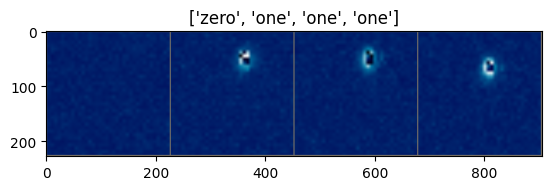

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders["validation"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "validation"]
}

три функции, которые представляют собой базовые блоки для создания квантовых цепочек в какой-то фреймворк работы с квантовыми компьютерами, похоже, что это PennyLane из-за использования qml. Это библиотека для квантового машинного обучения.

* H_layer(nqubits): Эта функция применяет квантовую операцию, известную как вентиль Адамара (Hadamard gate), ко всем кубитам в системе. Это создает слой однокубитовых вентилей Адамара. Каждый из этих вентилей преобразует базовое состояние в суперпозицию базовых состояний. Если наш начальный кубит находится в классическом состоянии 0 или 1, операция Адамара помещает его в равновероятное состояние суперпозиции, что является ключевым шагом во многих квантовых алгоритмах.

* RY_layer(w): Вторая функция создаёт слой параметризированных однокубитных вращений вокруг оси Y (указанные в массиве w). Каждое вращение генерируется вентилем RY, который вращает кубит вокруг оси Y на специфический угол. В массиве w содержатся углы в радианах для каждого кубита. Такие операции могут использоваться для создания квантовых состояний, зависящих от данных или параметров для оптимизации в квантовых алгоритмах машинного обучения.

* entangling_layer(nqubits): Третья функция создаёт слой двухкубитных операций CNOT (Controlled NOT), которые представляют собой основную форму квантовой запутанности в цепочке кубитов. Эта функция поочередно применяет вентиль CNOT к парам кубитов: сначала ко всем парам с чётными начальными индексами (0 и 1, 2 и 3 и так далее), а затем ко всем парам с нечетными начальными индексами (1 и 2, 3 и 4 и так далее). Эффект от применения CNOT состоит в том, что значение второго кубита (target) изменяется в зависимости от состояния первого кубита (control). Это ключевой компонент для создания запутанных квантовых состояний, которые лежат в основе квантовых вычислений и информации.

In [ ]:
def H_layer(nqubits):
    """Layer of single-qubit Hadamard gates.
    """
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)


def RY_layer(w):
    """Layer of parametrized qubit rotations around the y axis.
    """
    for idx, element in enumerate(w):
        qml.RY(element, wires=idx)


def entangling_layer(nqubits):
    """Layer of CNOTs followed by another shifted layer of CNOT.
    """
    # In other words it should apply something like :
    # CNOT  CNOT  CNOT  CNOT...  CNOT
    #   CNOT  CNOT  CNOT...  CNOT
    for i in range(0, nqubits - 1, 2):  # Loop over even indices: i=0,2,...N-2
        qml.CNOT(wires=[i, i + 1])
    for i in range(1, nqubits - 1, 2):  # Loop over odd indices:  i=1,3,...N-3
        qml.CNOT(wires=[i, i + 1])

Функция quantum_net, которая представляет собой вариационную квантовую схему (англ. variational quantum circuit). Она используется в качестве квантовой нейронной сети в области квантового машинного обучения. Для работы схемы используется библиотека PennyLane, что указывается декоратором @qml.qnode(dev). Это означает, что функция quantum_net будет исполняться на квантовом устройстве или симуляторе, обозначенном dev.

Функция quantum_net принимает два аргумента:

q_input_features: вектор вещественных чисел, который представляет собой входные признаки для квантовой схемы.
q_weights_flat: одномерный массив весов, который предполагается использовать в вариационной квантовой схеме, предварительно "сплющенный" (то есть преобразованный в одномерный вид).

In [ ]:
@qml.qnode(dev)
def quantum_net(q_input_features, q_weights_flat):
    """
    The variational quantum circuit.
    """

    # Reshape weights
    q_weights = q_weights_flat.reshape(q_depth, n_qubits)

    # Start from state |+> , unbiased w.r.t. |0> and |1>
    H_layer(n_qubits)

    # Embed features in the quantum node
    RY_layer(q_input_features)

    # Sequence of trainable variational layers
    for k in range(q_depth):
        entangling_layer(n_qubits)
        RY_layer(q_weights[k])

    # Expectation values in the Z basis
    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]
    return tuple(exp_vals)

Данный код описывает класс DressedQuantumNet, который представляет собой нейронную сеть, вероятно, интегрирующую квантовые вычисления с традиционной нейросетью на основе PyTorch (фреймворк для машинного обучения). Это видно из комментариев и названий методов класса. Вот общая идея того, что делает каждая часть кода:

Класс DressedQuantumNet наследуется от nn.Module, который является базовым классом для всех нейросетевых модулей в PyTorch.

Метод __init__ инициализирует модуль:

self.pre_net - линейный слой PyTorch, который принимает входные данные с 512 признаками и сжимает их до n_qubits, где n_qubits - это, вероятно, параметр, определяющий количество кубитов в квантовой части сети.
self.q_params - параметры, определённые как обучаемый тензор PyTorch, инициализируемый нормально распределёнными значениями (умноженными на q_delta, которая, возможно, масштабирует тензор), и представляющие параметры для квантового слоя/схемы. Размерность этого тензора q_depth * n_qubits предполагает наличие q_depth параметров на каждый кубит.
self.post_net - ещё один линейный слой PyTorch, который преобразует выходные данные квантовой части, имеющие размерность n_qubits, обратно в тензор с двумя признаками.
Метод forward определяет прямое распространение (forward pass) в сети:

Сначала входные признаки снижаются с 512 до n_qubits с помощью уже определённого линейного слоя self.pre_net.
Затем проходит активация через torch.tanh, и результат масштабируется до диапазона [0, π/2].
После этого в цикле применяется некий квантовый слой или функция quantum_net к каждому элементу пакета данных (batch), полученному из q_in, с использованием квантовых параметров self.q_params. Полученные выходные данные объединяют в один тензор q_out. Эта операция, возможно, требует определения функции или слоя quantum_net вне представленного кода.
На последнем этапе q_out передается через постпроцессинговый линейный слой self.post_net, который возвращает итоговое двумерное предсказание.

In [ ]:
class DressedQuantumNet(nn.Module):
    """
    Torch module implementing the *dressed* quantum net.
    """

    def __init__(self):
        """
        Definition of the *dressed* layout.
        """

        super().__init__()
        self.pre_net = nn.Linear(512, n_qubits)
        self.q_params = nn.Parameter(q_delta * torch.randn(q_depth * n_qubits))
        self.post_net = nn.Linear(n_qubits, 2)

    def forward(self, input_features):
        """
        Defining how tensors are supposed to move through the *dressed* quantum
        net.
        """

        # obtain the input features for the quantum circuit
        # by reducing the feature dimension from 512 to 4
        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0

        # Apply the quantum circuit to each element of the batch and append to q_out
        q_out = torch.Tensor(0, n_qubits)
        q_out = q_out.to(device)
        for elem in q_in:
            q_out_elem = torch.hstack(quantum_net(elem, self.q_params)).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))

        # return the two-dimensional prediction from the postprocessing layer
        return self.post_net(q_out)

Этот код загружает предварительно обученную модель ResNet18 из библиотеки torchvision с весами, обученными на ImageNet, и заменяет её последний полносвязный слой пользовательской квантовой нейронной сетью DressedQuantumNet(). Далее он переводит модель на устройство, определяемое объектом device, при этом предотвращая обучение всех предшествующих слоев модели путём выключения градиентов.

In [ ]:
weights = torchvision.models.ResNet18_Weights.IMAGENET1K_V1
model_hybrid = torchvision.models.resnet18(weights=weights)

for param in model_hybrid.parameters():
    param.requires_grad = False


# Notice that model_hybrid.fc is the last layer of ResNet18
model_hybrid.fc = DressedQuantumNet()

# Use CUDA or CPU according to the "device" object.
model_hybrid = model_hybrid.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer_hybrid = optim.Adam(model_hybrid.fc.parameters(), lr=step)

In [ ]:
exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer_hybrid, step_size=10, gamma=gamma_lr_scheduler
)

Производится обучение модели на тренировочных дынных

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_loss = 10000.0  # Large arbitrary number
    best_acc_train = 0.0
    best_loss_train = 10000.0  # Large arbitrary number
    print("Training started:")

    for epoch in range(num_epochs):

        # Each epoch has a training and validation phase
        for phase in ["train", "validation"]:
            if phase == "train":
                # Set model to training mode
                model.train()
            else:
                # Set model to evaluate mode
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            n_batches = dataset_sizes[phase] // batch_size
            it = 0
            for inputs, labels in dataloaders[phase]:
                since_batch = time.time()
                batch_size_ = len(inputs)
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                # Track/compute gradient and make an optimization step only when training
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Print iteration results
                running_loss += loss.item() * batch_size_
                batch_corrects = torch.sum(preds == labels.data).item()
                running_corrects += batch_corrects
                print(
                    "Phase: {} Epoch: {}/{} Iter: {}/{} Batch time: {:.4f}".format(
                        phase,
                        epoch + 1,
                        num_epochs,
                        it + 1,
                        n_batches + 1,
                        time.time() - since_batch,
                    ),
                    end="\r",
                    flush=True,
                )
                it += 1

            # Print epoch results
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            print(
                "Phase: {} Epoch: {}/{} Loss: {:.4f} Acc: {:.4f}        ".format(
                    "train" if phase == "train" else "validation  ",
                    epoch + 1,
                    num_epochs,
                    epoch_loss,
                    epoch_acc,
                )
            )

            # Check if this is the best model wrt previous epochs
            if phase == "validation" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "validation" and epoch_loss < best_loss:
                best_loss = epoch_loss
            if phase == "train" and epoch_acc > best_acc_train:
                best_acc_train = epoch_acc
            if phase == "train" and epoch_loss < best_loss_train:
                best_loss_train = epoch_loss

            # Update learning rate
            if phase == "train":
                scheduler.step()

    # Print final results
    model.load_state_dict(best_model_wts)
    time_elapsed = time.time() - since
    print(
        "Training completed in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60)
    )
    print("Best test loss: {:.4f} | Best test accuracy: {:.4f}".format(best_loss, best_acc))
    return model

Непосредственный запуск обучения модели

In [ ]:
model_hybrid = train_model(
    model_hybrid, criterion, optimizer_hybrid, exp_lr_scheduler, num_epochs=num_epochs
)

Training started:
Phase: train Epoch: 1/3 Loss: 0.5757 Acc: 0.7476        
Phase: validation   Epoch: 1/3 Loss: 0.4163 Acc: 0.9671        
Phase: train Epoch: 2/3 Loss: 0.4434 Acc: 0.8903        
Phase: validation   Epoch: 2/3 Loss: 0.3321 Acc: 0.9630        
Phase: train Epoch: 3/3 Loss: 0.3835 Acc: 0.8834        
Phase: validation   Epoch: 3/3 Loss: 0.2507 Acc: 0.9685        
Training completed in 10m 2s
Best test loss: 0.2507 | Best test accuracy: 0.9685


Данная функция расчитывает метрики

In [ ]:
def calculate_metrics(preds, labels):
    true_positives = torch.sum((preds == 1) & (labels == 1)).item()
    false_positives = torch.sum((preds == 1) & (labels == 0)).item()
    false_negatives = torch.sum((preds == 0) & (labels == 1)).item()

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1

Визуализируем результат работы модели

In [ ]:
def visualize_model(model, num_images=6, fig_name="Predictions"):
    images_so_far = 0
    _fig = plt.figure(fig_name)
    model.eval()
    with torch.no_grad():
        for _i, (inputs, labels) in enumerate(dataloaders["validation"]):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis("off")
                ax.set_title("[{}]".format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    return

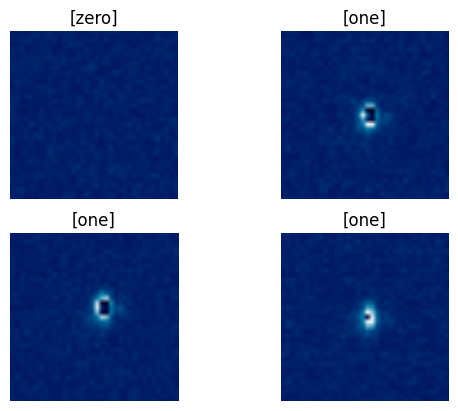

In [ ]:
visualize_model(model_hybrid, num_images=batch_size)
plt.show()

In [ ]:
def simple_visualize_model(model, image_path, fig_name="Predictions"):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        _, preds = torch.max(outputs, 1)

    print(class_names[preds.item()])
    plt.figure(fig_name)
    ax = plt.subplot(1, 1, 1)
    ax.axis("off")
    ax.set_title("[{}]".format(class_names[preds.item()]))
    imshow(image_tensor.squeeze().cpu())

t1 = time.time()
simple_visualize_model(model_hybrid, "/content/quantum-data/val/zero/011da22f-6890-4af5-9f42-facd87e2d75b(1)_Q2_S0.png")
print(time.time() - t1)

Функция, которая передает модели картинку, со всеми необходимыми преобразованиями и возвращает из модели метку класса

In [ ]:
def simple_detection(model, image: Image):
    image = image.convert("RGB")
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        _, preds = torch.max(outputs, 1)

    return 1 if class_names[preds.item()] == 'one' else 0


In [ ]:
def split_qubits(image: Image) -> tuple[Image]:
    # Get image statistix
    w, h = image.size

    # Spliting qubits ((left, top, right, bottom))
    first_qubit = image.crop((0, 0 * h / 4, w, 1 * h / 4))
    second_qubit = image.crop((0, 1 * h / 4, w, 2 * h / 4))
    third_qubit = image.crop((0, 2 * h / 4, w, 3 * h / 4))
    four_qubit = image.crop((0, 3 * h / 4, w, 4 * h / 4))

    return first_qubit, second_qubit, third_qubit, four_qubit

Метод, который формирует результирующую таблицу с ответами для проверки организаторами

In [ ]:
def fill_table():
    PATH = '/content/Входные данные'
    columns = ["file number", "file name", "qubit 1 state", "qubit 2 state", "qubit 3 state", "qubit 4 state"]

    index = 0
    data = []
    for file in tqdm(os.listdir(PATH)):
        qubits = split_qubits(Image.open(os.path.join(PATH, file)))
        data.append([index,
                     file,
                     simple_detection(model=model_hybrid, image=qubits[0]),
                     simple_detection(model=model_hybrid, image=qubits[1]),
                     simple_detection(model=model_hybrid, image=qubits[2]),
                     simple_detection(model=model_hybrid, image=qubits[3])])
        index += 1

    df = pd.DataFrame(data, columns = columns)
    df.to_csv("labeled_ions_team_number.csv", sep=';', encoding='utf-8', index=False)

fill_table()

100%|██████████| 1020/1020 [09:11<00:00,  1.85it/s]


Метод который позволяет оценить работу модели

In [ ]:
def score_model(model):
    model.eval()
    total_preds = torch.tensor([], dtype=torch.long, device=device)
    total_labels = torch.tensor([], dtype=torch.long, device=device)
    with torch.no_grad():
        for _i, (inputs, labels) in enumerate(dataloaders["validation"]):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            total_preds = torch.cat((total_preds, preds), dim=0)
            total_labels = torch.cat((total_labels, labels), dim=0)

    precision, recall, f1 = calculate_metrics(total_preds, total_labels)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)


In [ ]:
score_model(model_hybrid)

Precision: 0.9407216494845361
Recall: 1.0
F1: 0.9694555112881806


In [ ]:
precision, recall, f1 = calculate_metrics(preds, labels)